Created by Jake Norbie

## Introduction to the Dataset

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from pathlib import Path

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

train_data_dir = Path('../data/original/train.csv')
stores_data_dir = Path('../data/original/stores.csv')
transactions_data_dir = Path('../data/original/transactions.csv')
holidays_events_data_dir = Path('../data/original/holidays_events.csv')
oil_data_dir = Path('../data/original/oil.csv')


training_datatype_map = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}
stores_datatype_map = {
    'cluster': 'int8',
}

train_df = pd.read_csv(
    train_data_dir,
    dtype=training_datatype_map,
    parse_dates=['date'],
)
stores_df = pd.read_csv(stores_data_dir, dtype=stores_datatype_map)   
transactions_df = pd.read_csv(transactions_data_dir, parse_dates=['date']).sort_values(['date', 'store_nbr'])
holidays_events_df = pd.read_csv(holidays_events_data_dir, parse_dates=['date'])
oil_df = pd.read_csv(oil_data_dir, parse_dates=['date'])

In [22]:
train_df.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0
1,1,2013-01-01,1,BABY CARE,0.00,0
2,2,2013-01-01,1,BEAUTY,0.00,0
3,3,2013-01-01,1,BEVERAGES,0.00,0
4,4,2013-01-01,1,BOOKS,0.00,0
5,5,2013-01-01,1,BREAD/BAKERY,0.00,0
6,6,2013-01-01,1,CELEBRATION,0.00,0
7,7,2013-01-01,1,CLEANING,0.00,0
8,8,2013-01-01,1,DAIRY,0.00,0
9,9,2013-01-01,1,DELI,0.00,0


In [3]:
stores_df.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [4]:
transactions_df.head(10)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [5]:
holidays_events_df.head(10)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [6]:
oil_df.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


Additional Notes about the Dataset:

    -Wages in the public sector are paid every two weeks on the 15th and on the last day of the month. Supermarket sales could be affected by this.
    -A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.


## Training Dataset

Including within both the training and testing datasets are three differentiating features: store number, family, and onpromotion. While these are given, let's take a look into these three to see their use in finding the sales.

### Store Number

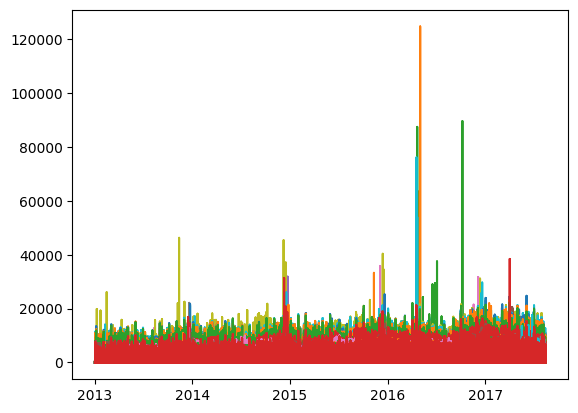

In [21]:
for k,v in train_df.groupby("store_nbr", observed=False):
    plt.plot(v["date"],v["sales"])
plt.show()

C:\Users\jaken\AppData\Local\Temp\ipykernel_3096\3079772871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_correlation_df["ind"]= 1
C:\Users\jaken\AppData\Local\Temp\ipykernel_3096\3079772871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_correlation_df["ind"] = store_correlation_df.groupby("store_nbr", observed=False).ind.cumsum().values
c:\Users\jaken\Documents\GitHub\cuddly-computing-machine\.venv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to Maske

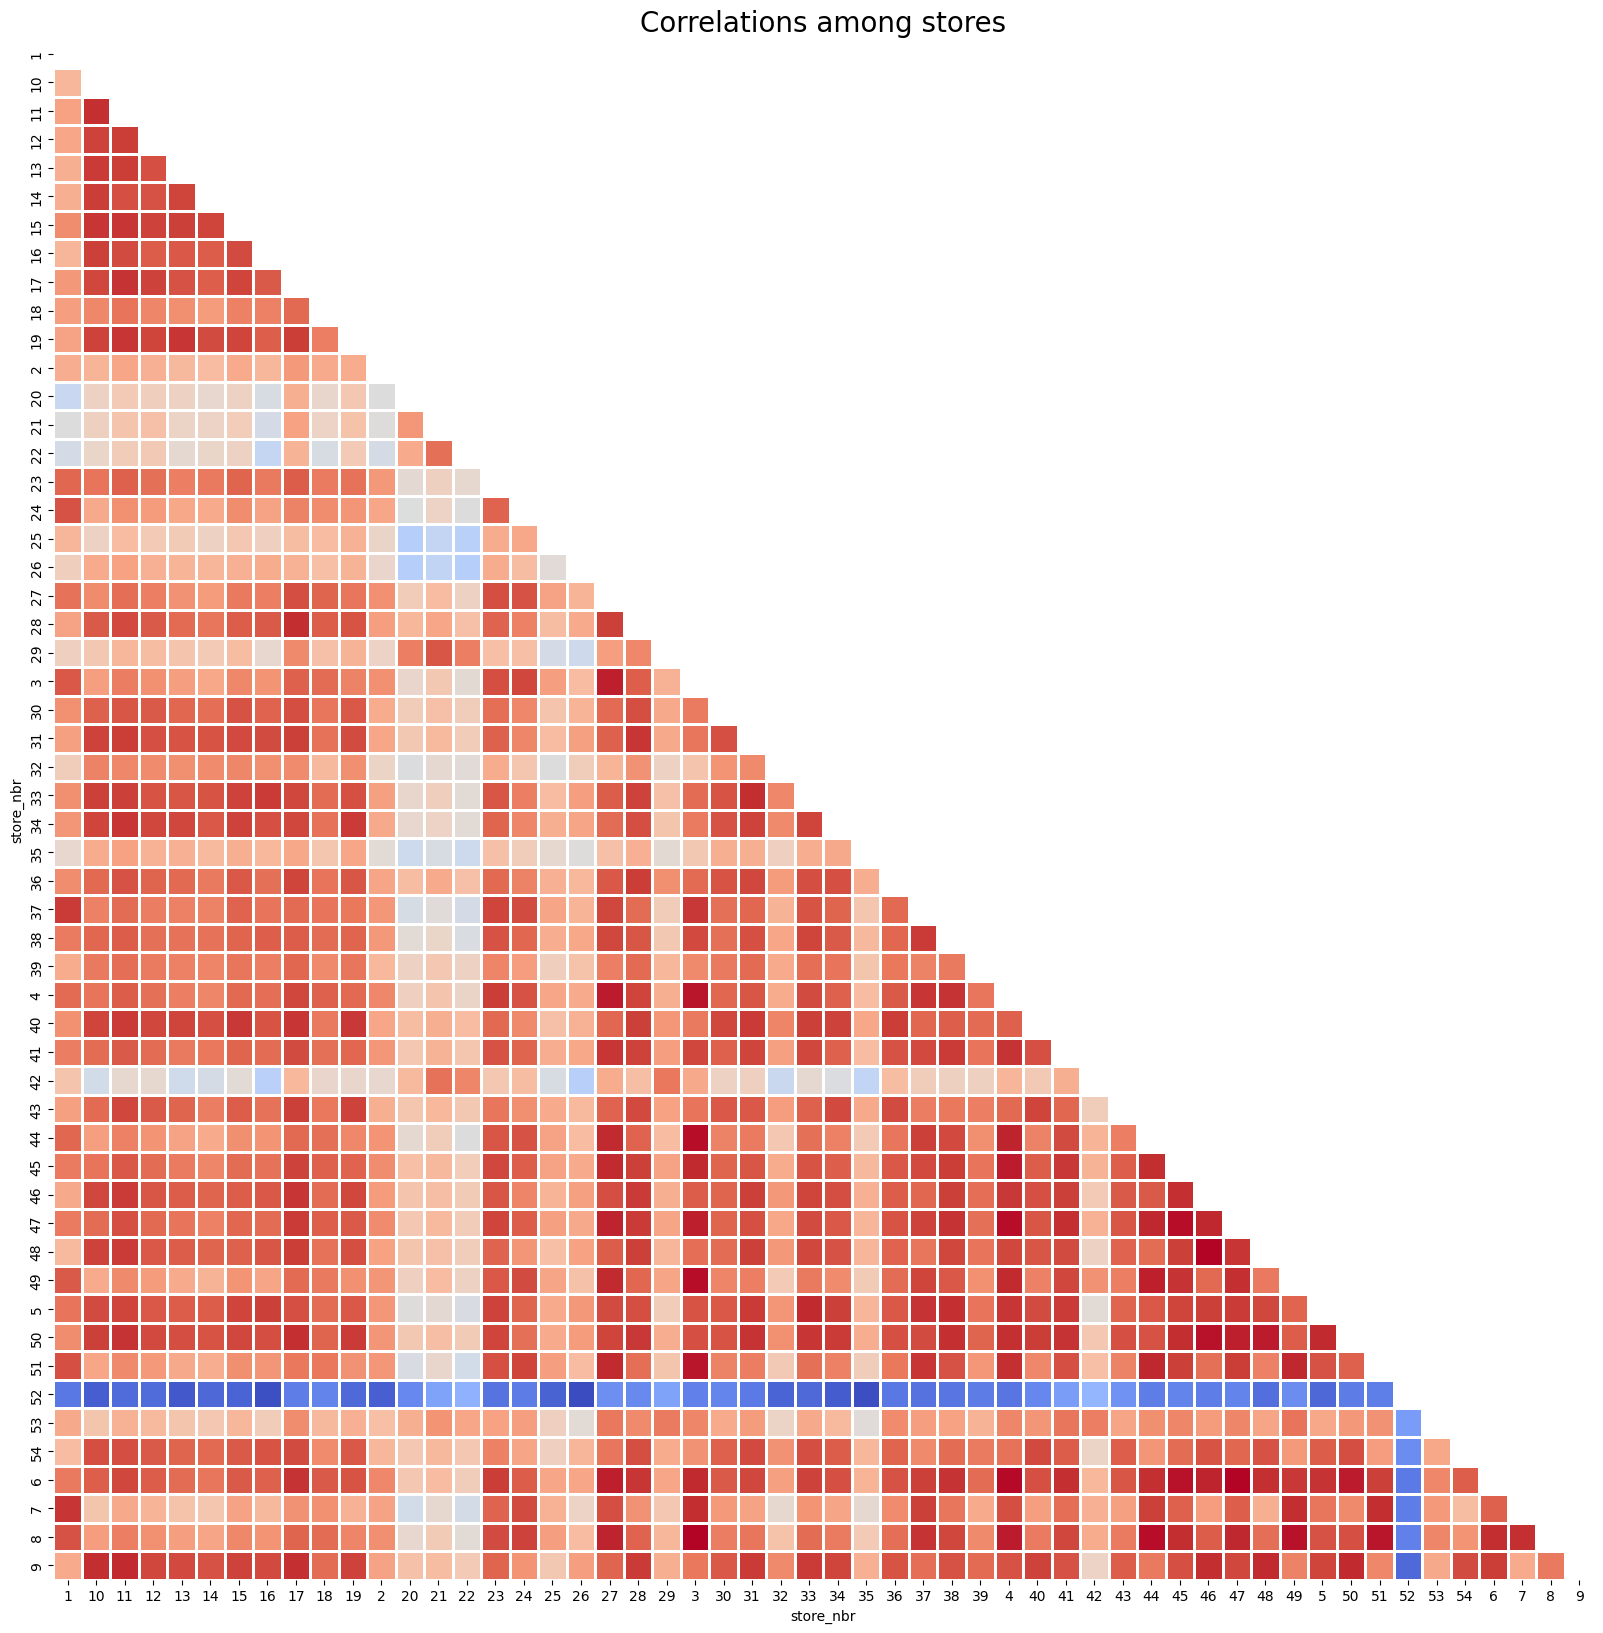

In [19]:
store_correlation_df = train_df[["store_nbr", "sales"]]
store_correlation_df["ind"]= 1
store_correlation_df["ind"] = store_correlation_df.groupby("store_nbr", observed=False).ind.cumsum().values
store_correlation_df = pd.pivot(store_correlation_df, index = "ind", columns = "store_nbr", values = "sales").corr()
mask = np.triu(store_correlation_df.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(store_correlation_df,
        annot=True,
        cmap='coolwarm',
        square=True,
        mask=mask,
        linewidths=1,
        cbar=False)
plt.title("Correlations among stores",fontsize = 20)
plt.show()

For the most part, most stores are correlated with one another. However, some outliers do exist within the bunch.

### Family

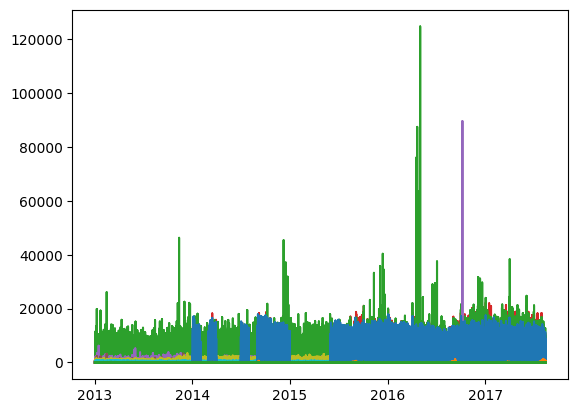

In [20]:
for k,v in train_df.groupby("family", observed=False):
    plt.plot(v["date"],v["sales"])
plt.show()

C:\Users\jaken\AppData\Local\Temp\ipykernel_7632\3073042767.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  family_grouped_data =train_df.groupby('family')['sales'].mean().sort_values(ascending=False).to_frame()
C:\Users\jaken\AppData\Local\Temp\ipykernel_7632\3073042767.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=family_grouped_data,x=family_grouped_data.sales,y=family_grouped_data.index,ci=None,order=list(family_grouped_data.index))
c:\Users\jaken\Documents\GitHub\cuddly-computing-machine\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector

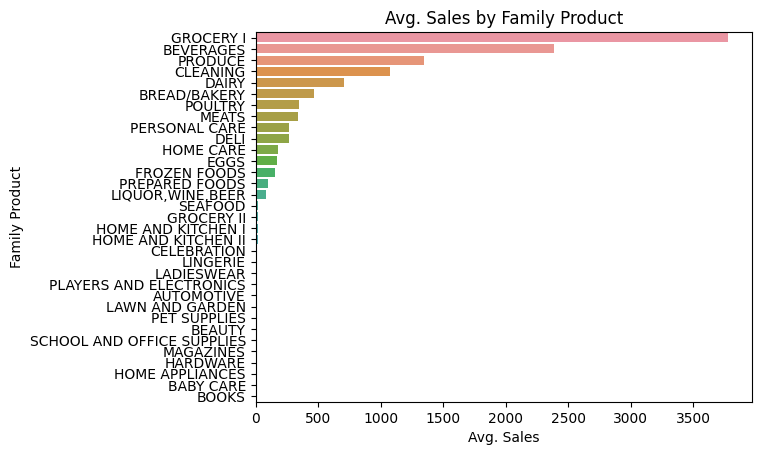

In [26]:
family_grouped_data =train_df.groupby('family')['sales'].mean().sort_values(ascending=False).to_frame()

sns.barplot(data=family_grouped_data,x=family_grouped_data.sales,y=family_grouped_data.index,ci=None,order=list(family_grouped_data.index))
plt.xlabel('Avg. Sales')
plt.ylabel('Family Product')
plt.title('Avg. Sales by Family Product')
plt.show()

C:\Users\jaken\AppData\Local\Temp\ipykernel_7632\392759077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_correlation_df["ind"]= 1
C:\Users\jaken\AppData\Local\Temp\ipykernel_7632\392759077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_correlation_df["ind"] = family_correlation_df.groupby("family", observed=False).ind.cumsum().values
c:\Users\jaken\Documents\GitHub\cuddly-computing-machine\.venv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedC

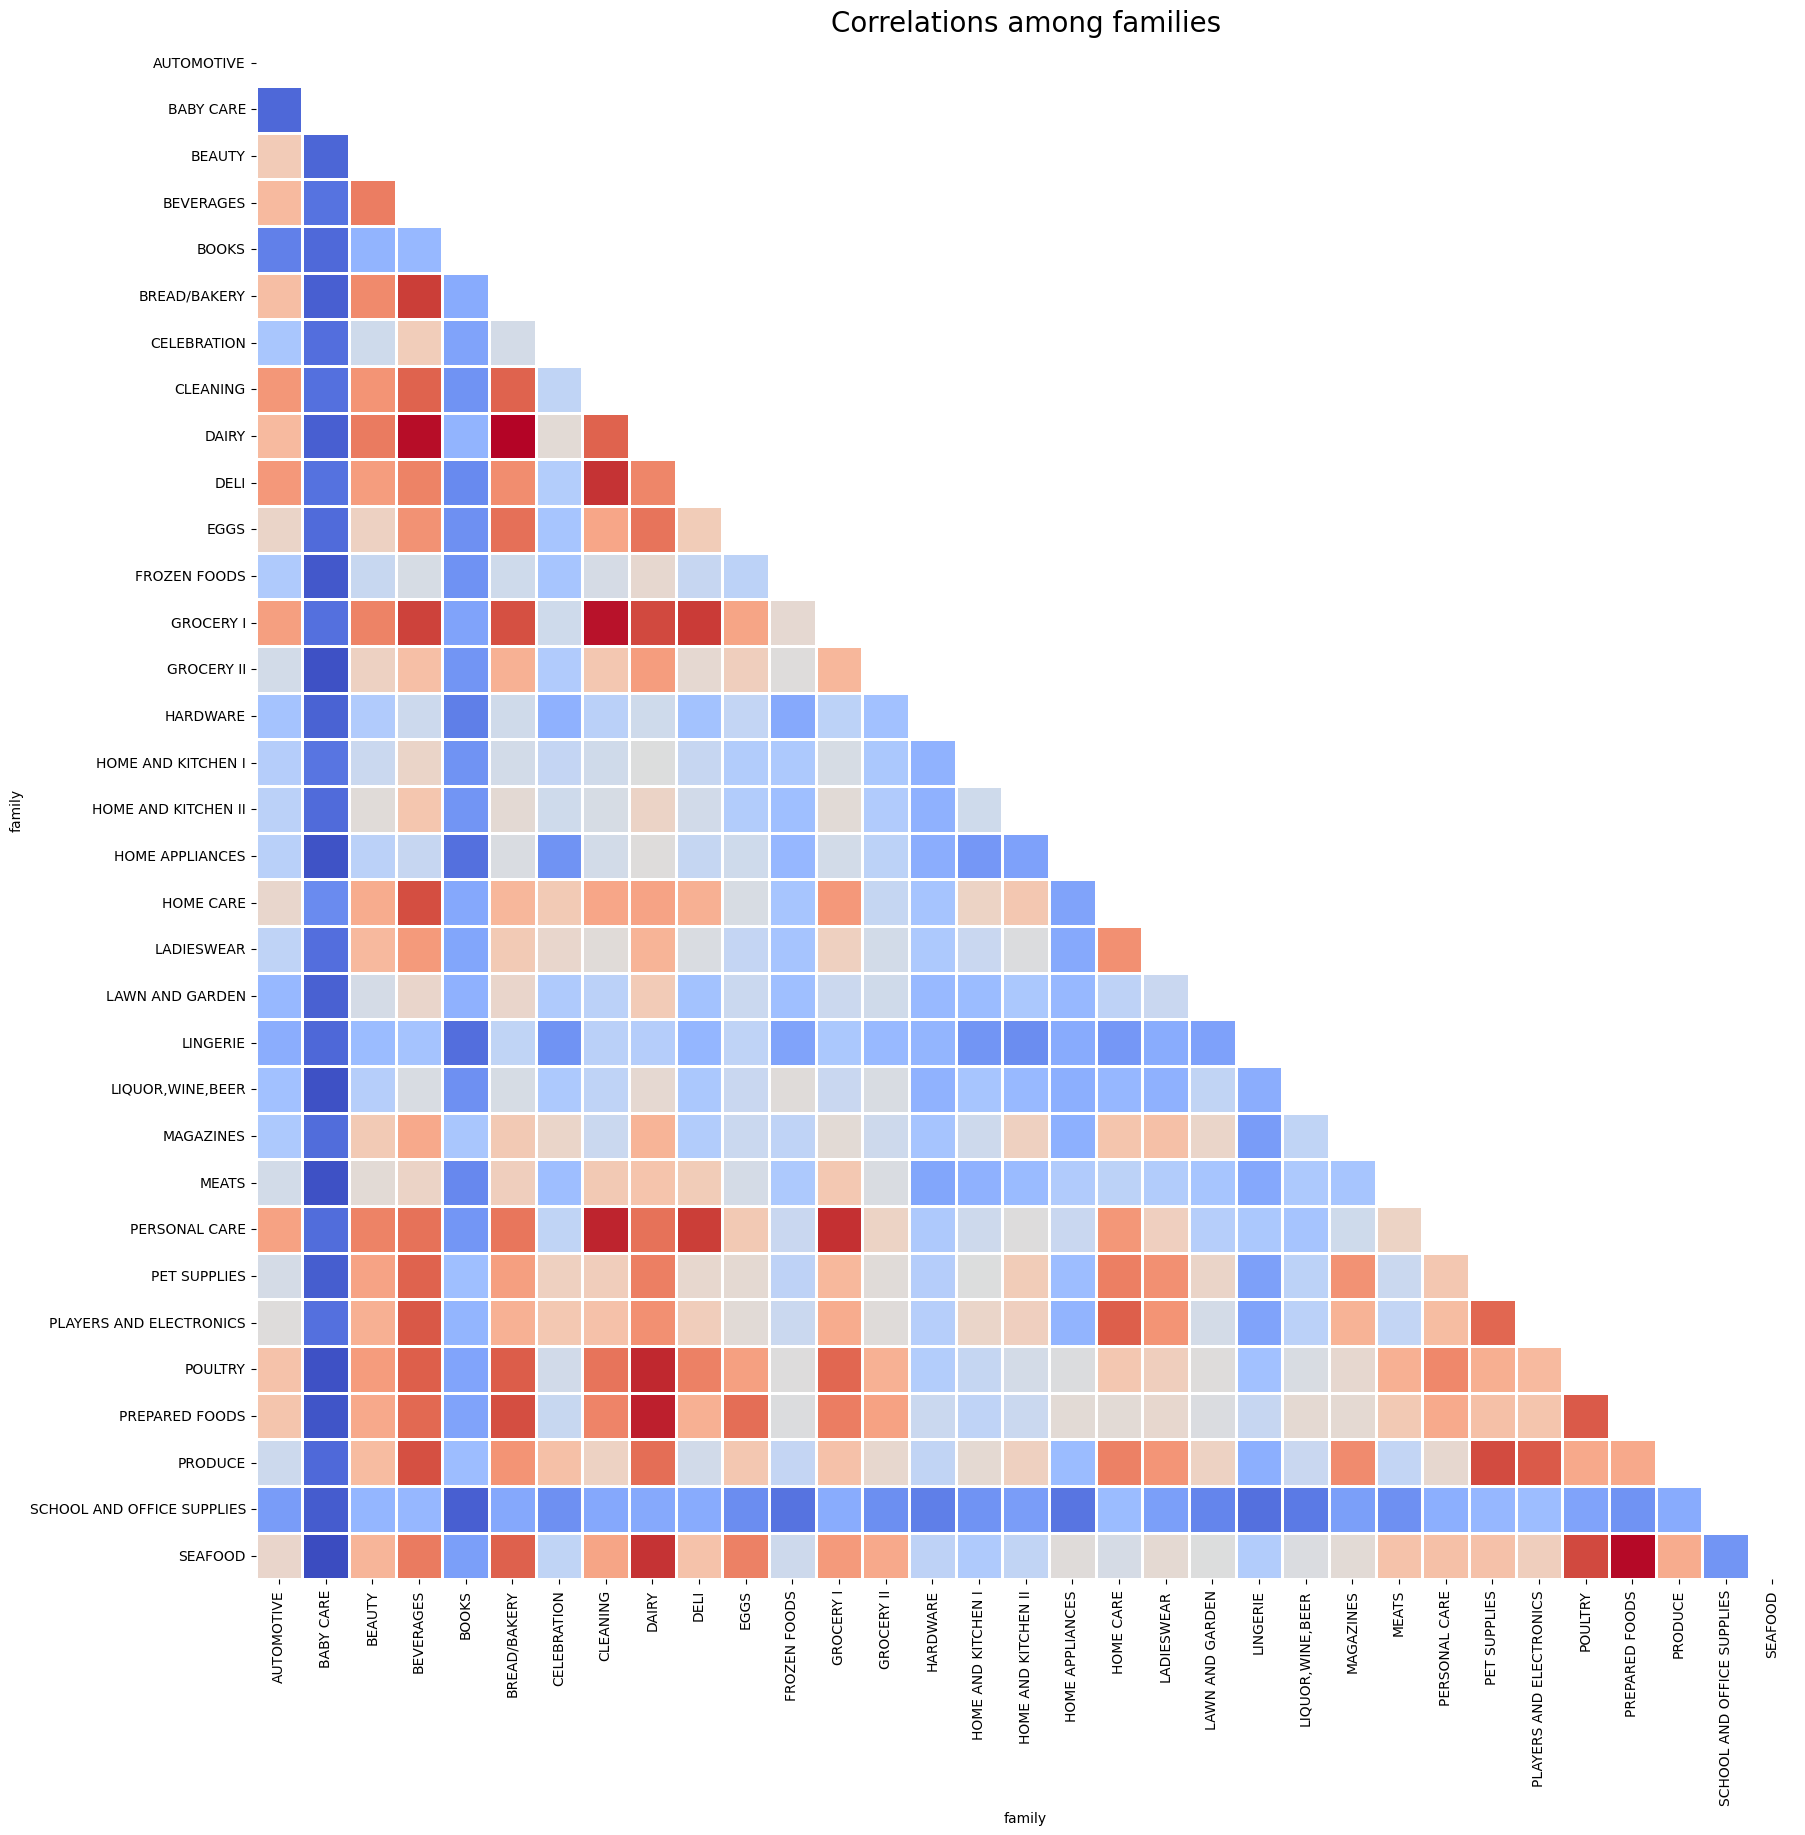

In [25]:
family_correlation_df = train_df[["family", "sales"]]
family_correlation_df["ind"]= 1
family_correlation_df["ind"] = family_correlation_df.groupby("family", observed=False).ind.cumsum().values
family_correlation_df = pd.pivot(family_correlation_df, index = "ind", columns = "family", values = "sales").corr()
mask = np.triu(family_correlation_df.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(family_correlation_df,
        annot=True,
        cmap='coolwarm',
        square=True,
        mask=mask,
        linewidths=1,
        cbar=False)
plt.title("Correlations among families",fontsize = 20)
plt.show()

Different families of products appear to not be very correlated, except ones of similar categories. A key example is that the food families are highly correlated with one another. As such, it may be useful to include a feature about the previous sales of similar families.

### Onpromotion

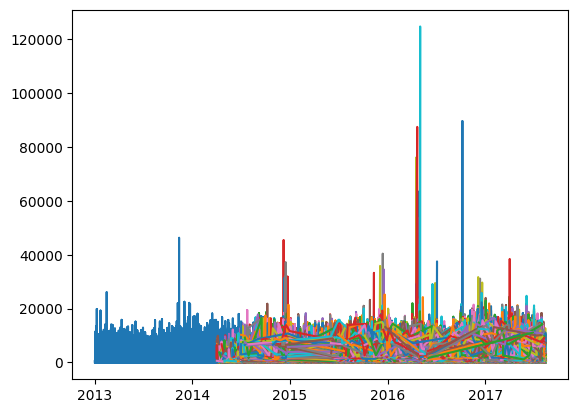

In [19]:
for k,v in train_df.groupby("onpromotion", observed=False):
    plt.plot(v["date"],v["sales"])
plt.show()

This looks pretty messy and is very hard to gain meaningful information from. So, let's simply take a look at the difference between a few onpromotion values.

In [15]:
print(train_df.groupby('onpromotion', observed=False).count())

                  id     date  store_nbr   family    sales
onpromotion                                               
0            2389559  2389559    2389559  2389559  2389559
1             174551   174551     174551   174551   174551
2              79386    79386      79386    79386    79386
3              45862    45862      45862    45862    45862
4              31659    31659      31659    31659    31659
...              ...      ...        ...      ...      ...
719                1        1          1        1        1
720                1        1          1        1        1
722                1        1          1        1        1
726                1        1          1        1        1
741                1        1          1        1        1

[362 rows x 5 columns]


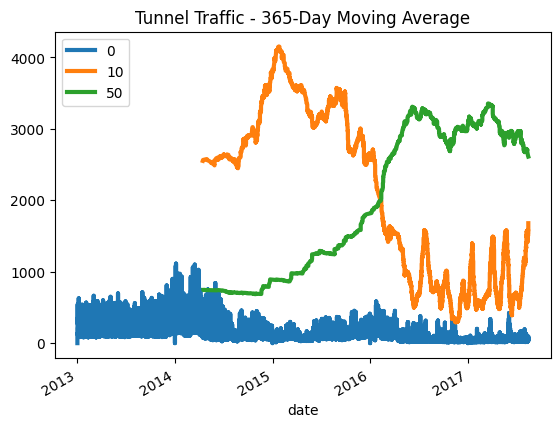

In [28]:
onpromotion_graphing_df = train_df[(train_df['onpromotion'] == 0) | (train_df['onpromotion'] == 10) | (train_df['onpromotion'] == 50)]
onpromotion_graphing_df = onpromotion_graphing_df[['onpromotion', 'date', 'sales']].set_index('date')
for k,v in onpromotion_graphing_df.groupby("onpromotion", observed=False):
    moving_average = v['sales'].rolling(
        window=365,       
        center=True,      
        min_periods=183,  
    ).mean()

    moving_average.plot(
        linewidth=3, title="Onpromotion Averages", legend=True, label=k
    )
    
plt.show()

With a more close up look at a few values we see that there is a clear differentiation between onpromotion values and sales.

## Transactions

Naturally, transactions will be highly correlated with store sales, since a store's total sales is a summation of its transactions. While this would be an excellent feature to utilize, we cannot view the transaction of the future, and therefore will not be included within the scope of this project.

## Oil

Here we look into the potential relationship between the oil prices and the sales of stores.

Spearman Coefficient between Oil Prices and Sales: -0.6603


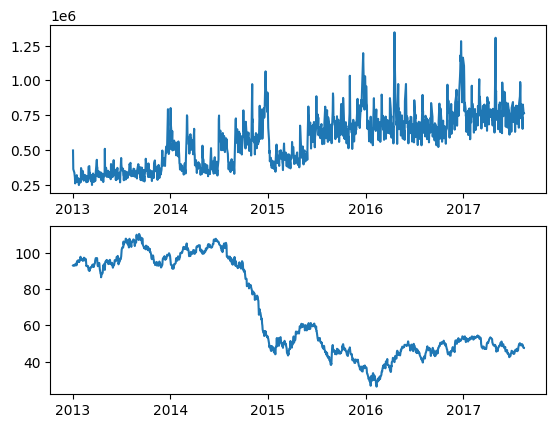

In [66]:
oil_sales_coefficient_df = train_df[['date', 'sales']].groupby('date', observed=False).sum().join(oil_df.set_index('date')['dcoilwtico'].dropna(), how='inner')
fig, axs = plt.subplots(2)
axs[0].plot(oil_sales_coefficient_df.index, oil_sales_coefficient_df['sales'])
axs[1].plot(oil_sales_coefficient_df.index, oil_sales_coefficient_df['dcoilwtico'])
print(f"Spearman Coefficient between Oil Prices and Sales: {oil_sales_coefficient_df['sales'].corr(oil_sales_coefficient_df['dcoilwtico'], method='spearman'):.4f}")

Maybe the oil prices will further affect certain areas of Ecuador. So we will check for later.

In [83]:
correlation_list = []
for store_number in train_df['store_nbr'].unique():
    store_number_df = train_df[train_df['store_nbr'] == store_number][['sales', 'date']]
    store_number_oil_df = train_df[train_df['store_nbr'] == store_number][['sales', 'date']].groupby('date', observed=False).sum().join(oil_df.set_index('date')['dcoilwtico'].dropna(), how='inner')
    correlation_store_oil = store_number_oil_df['sales'].corr(store_number_oil_df['dcoilwtico'])
    correlation_list.append(correlation_store_oil)
    print(f"Store number {store_number} correlation coefficient with oil prices: {correlation_store_oil}")

print(f'\nMax coefficient is {max(correlation_list)} \nMinimum coefficient is {min(correlation_list)}')


Store number 1 correlation coefficient with oil prices: -0.6193417501580037
Store number 10 correlation coefficient with oil prices: -0.38341716767603684
Store number 11 correlation coefficient with oil prices: -0.4996417240975842
Store number 12 correlation coefficient with oil prices: -0.45991807572398113
Store number 13 correlation coefficient with oil prices: -0.5637735617048684
Store number 14 correlation coefficient with oil prices: -0.500034882696218
Store number 15 correlation coefficient with oil prices: -0.6421391507453648
Store number 16 correlation coefficient with oil prices: -0.21826529408979684
Store number 17 correlation coefficient with oil prices: -0.6798685471469823
Store number 18 correlation coefficient with oil prices: -0.3109409146466365
Store number 19 correlation coefficient with oil prices: -0.6785869745002968
Store number 2 correlation coefficient with oil prices: -0.45356744943128285
Store number 20 correlation coefficient with oil prices: -0.725344609976448

With a wild variance of ~0.6 between stores, oil definitely has varying impacts based on location and perhaps other features.

## Holidays and Events

Before we look into holidays and events, we should first look at the metadata of the data. The column describes that there are a few instances where the holidays were moved/transferred or considered work days, harshly reducing their cultural values and impact. In order to see the potential trend, we will take them out.

In [23]:
holidays_events_reduced_df = holidays_events_df.loc[(holidays_events_df.transferred == False) & (holidays_events_df.type != 'Work Day')]
holidays_events_reduced_df = holidays_events_reduced_df.drop_duplicates(subset='date')

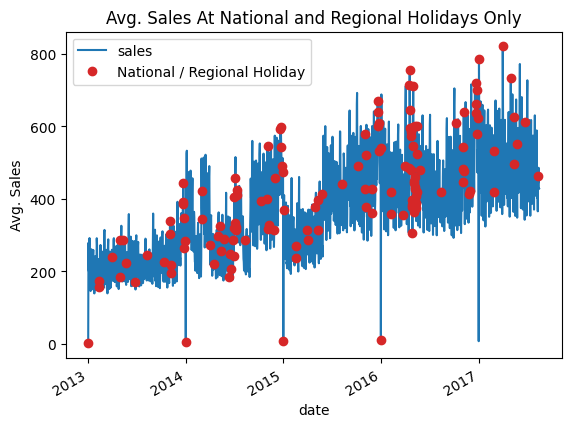

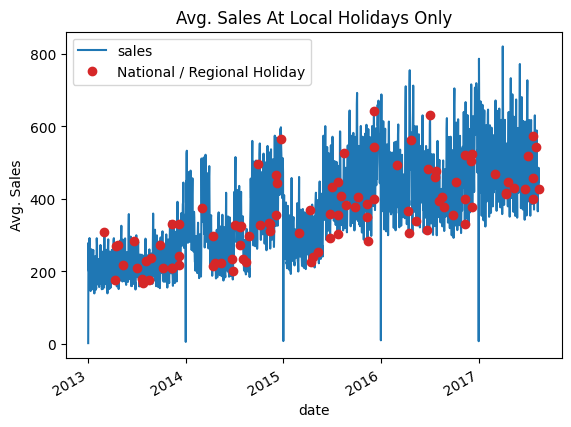

In [9]:
average_sales = train_df.groupby('date')['sales'].mean().to_frame()

national_regional_holidays = holidays_events_reduced_df.loc[holidays_events_reduced_df['locale']!='Local',:]
national_regional_holidays_avg_sales = average_sales.reset_index().merge(national_regional_holidays,on='date',how='left')
x_cor=national_regional_holidays_avg_sales.loc[national_regional_holidays_avg_sales['type'].notna(),'date'].values
y_cor=national_regional_holidays_avg_sales.loc[national_regional_holidays_avg_sales['type'].notna(),'sales'].values
_=average_sales['sales'].plot()
_=plt.plot_date(x_cor,y_cor,color='C3', label='National / Regional Holiday')
_=plt.ylabel('Avg. Sales')
_=plt.title('Avg. Sales At National and Regional Holidays Only')
_=plt.legend()

plt.show()

local_holidays = holidays_events_reduced_df.loc[holidays_events_reduced_df['locale']=='Local',:]
local_holidays_avg_sales = average_sales.reset_index().merge(local_holidays,on='date',how='left')
x_cor=local_holidays_avg_sales.loc[local_holidays_avg_sales['type'].notna(),'date'].values
y_cor=local_holidays_avg_sales.loc[local_holidays_avg_sales['type'].notna(),'sales'].values
_=average_sales['sales'].plot()
_=plt.plot_date(x_cor,y_cor,color='C3', label='National / Regional Holiday')
_=plt.ylabel('Avg. Sales')
_=plt.title('Avg. Sales At Local Holidays Only')
_=plt.legend()

plt.show()

From the looks of it, it looks like local holidays are not significant but national/regional are. This concurs with standard logic, where during local holidays people will not be influenced to buy/not buy at stores whereas with national/regional holidays stores may be closed or require trips beforehand (Thanksgiving food, Christmas gifts, etc.) and influence sales.

In [ ]:
holidays_events_reduced_df = holidays_events_reduced_df[holidays_events_reduced_df.locale!='Local']

In [21]:
holidays_events_reduced_df = holidays_events_reduced_df[['date','type']] ## Keep date & holiday type for merging
train_holiday_df = pd.merge(left=train_df, right=holidays_events_reduced_df, on='date', how='left')
train_holiday_df.rename({'type':'is_holiday'},axis=1,inplace=True)
train_holiday_df['is_holiday'] = train_holiday_df.is_holiday.map({'Holiday':1,'Additional':2,'Event':3,
                                                  'Bridge':4,'Transfer':5}).fillna(0).astype('int8')

train_holiday_df.set_index('date',inplace=True)
train_holiday_df['day_of_week']=train_holiday_df.index.dayofweek.astype('int8')
train_holiday_df.loc[(train_holiday_df['day_of_week']==5) | (train_holiday_df['day_of_week']==6), 'is_holiday']=1

train_holiday_df['day_of_year']=train_holiday_df.index.dayofyear.astype('int16')
train_holiday_df.loc[train_holiday_df['day_of_year']==1 ,'is_holiday'] = 0

train_holiday_df.head()

,id,store_nbr,family,sales,onpromotion,is_holiday,day_of_week,day_of_year
date,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.00,0,0,1,1
2013-01-01,1,1,BABY CARE,0.00,0,0,1,1
2013-01-01,2,1,BEAUTY,0.00,0,0,1,1
2013-01-01,3,1,BEVERAGES,0.00,0,0,1,1
2013-01-01,4,1,BOOKS,0.00,0,0,1,1


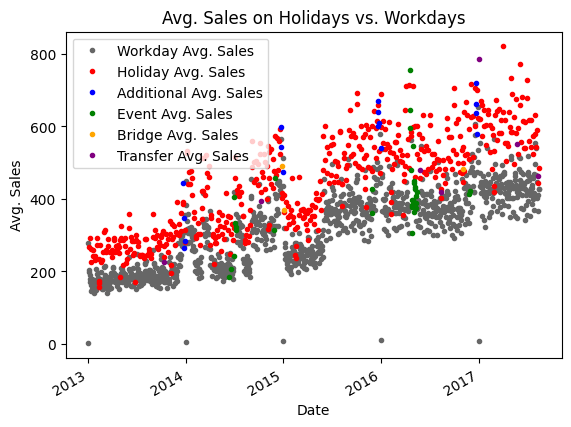

In [22]:
avg_sales_holiday=train_holiday_df[train_holiday_df.is_holiday==1].groupby('date')['sales'].mean()
avg_sales_adt=train_holiday_df[train_holiday_df.is_holiday==2].groupby('date')['sales'].mean()
avg_sales_event=train_holiday_df[train_holiday_df.is_holiday==3].groupby('date')['sales'].mean()
avg_sales_bridge=train_holiday_df[train_holiday_df.is_holiday==4].groupby('date')['sales'].mean()
avg_sales_transfer=train_holiday_df[train_holiday_df.is_holiday==5].groupby('date')['sales'].mean()
avg_sales_workday=train_holiday_df[train_holiday_df.is_holiday==0].groupby('date')['sales'].mean()

_=avg_sales_workday.plot(color='0.4',style='.', legend=True, label='Workday Avg. Sales')
_=avg_sales_holiday.plot(color='red',style='.', legend=True, label='Holiday Avg. Sales')
_=avg_sales_adt.plot(color='blue',style='.', legend=True, label='Additional Avg. Sales')
_=avg_sales_event.plot(color='green',style='.', legend=True, label='Event Avg. Sales')
_=avg_sales_bridge.plot(color='orange',style='.', legend=True, label='Bridge Avg. Sales')
_=avg_sales_transfer.plot(color='purple',style='.', legend=True, label='Transfer Avg. Sales')
plt.xlabel('Date')
plt.ylabel('Avg. Sales')
plt.title('Avg. Sales on Holidays vs. Workdays')

plt.show()

Using this, we can see that there is a clear distinction into which holidays promote sales: holidays, additional holiday days, and bridge holiday days. As we hypothesized earlier, transferred or local (event) holidays have little impact.

## Seasonality

Let's start simple with seasonality, and show a few average graphs for common seasons such as day of the week, day of the year, week, and month.

c:\Users\jaken\Documents\GitHub\cuddly-computing-machine\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaken\Documents\GitHub\cuddly-computing-machine\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaken\Documents\GitHub\cuddly-computing-machine\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaken\Documents\GitHub\cuddly-computing-machine\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarni

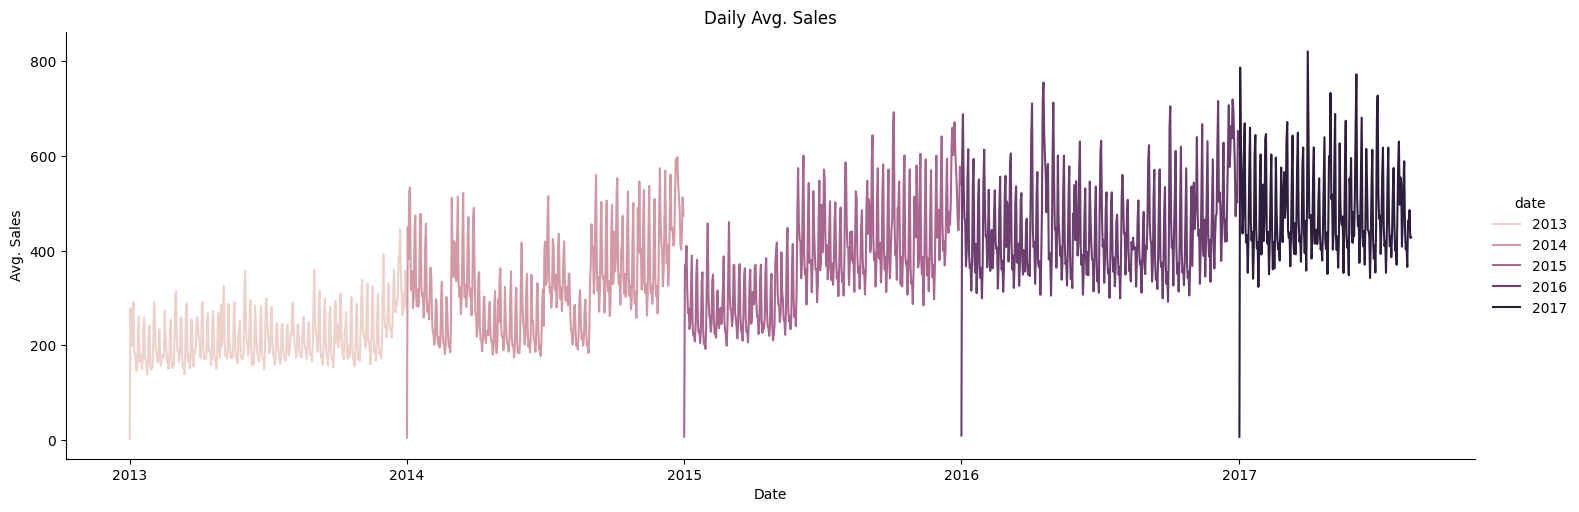

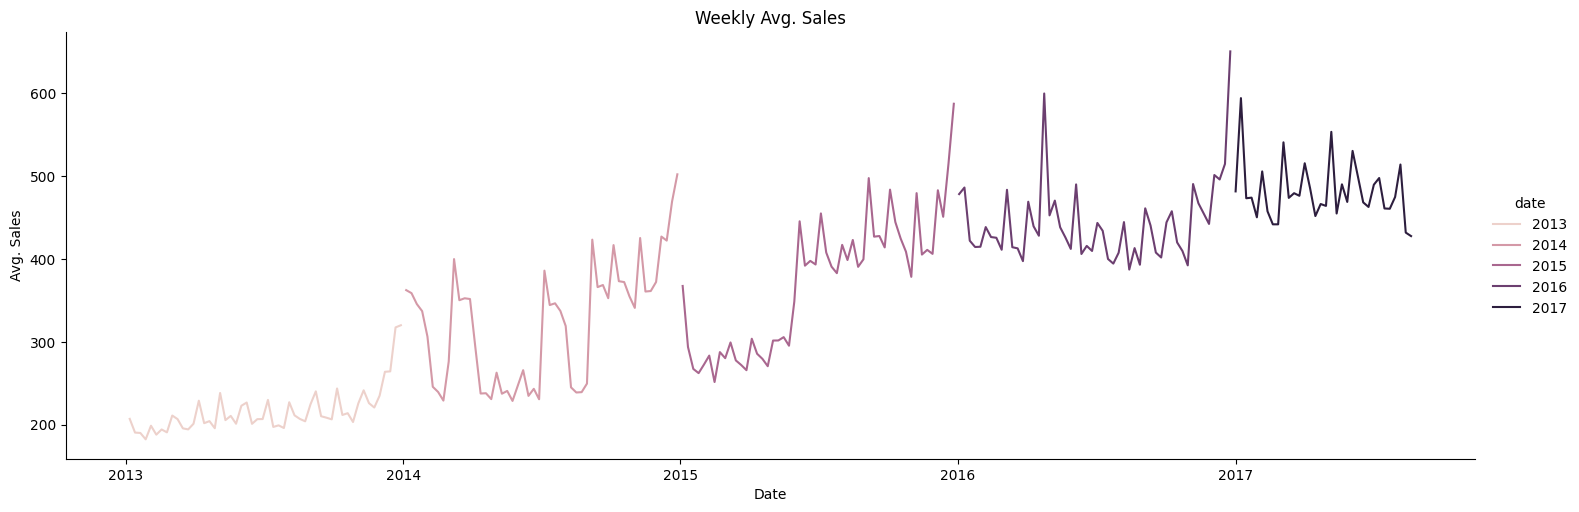

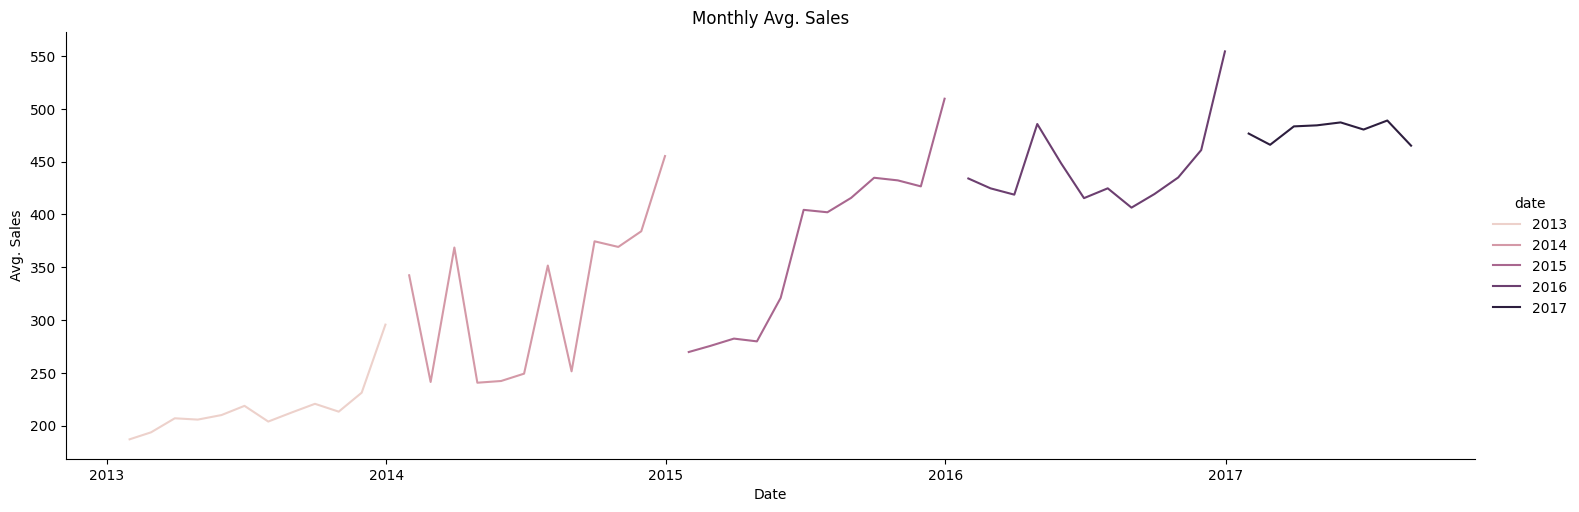

In [28]:
seasonality_train_df = train_df.copy()

seasonality_train_df = seasonality_train_df.set_index('date')

daily_sales = seasonality_train_df.resample('D').sales.mean().to_frame()  
weekly_sales = seasonality_train_df.resample('W').sales.mean().to_frame() 
monthly_sales = seasonality_train_df.resample('M').sales.mean().to_frame()

seasonality_graph_df=[daily_sales,weekly_sales,monthly_sales]
seasonality_titles=['Daily Avg. Sales','Weekly Avg. Sales','Monthly Avg. Sales']

for data, title in zip(seasonality_graph_df, seasonality_titles):
    sns.relplot(x=data.index,y=data.sales,kind='line',aspect=3,hue=data.index.year)
    plt.xlabel('Date')
    plt.ylabel('Avg. Sales')
    plt.title(title)

plt.show()

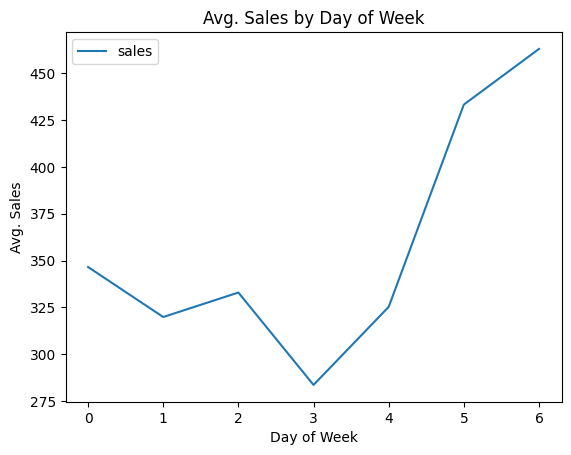

In [29]:
day_of_week_df = seasonality_train_df.groupby(seasonality_train_df.index.day_of_week)['sales'].mean().to_frame()

day_of_week_df.plot()
plt.xlabel('Day of Week')
plt.ylabel('Avg. Sales')
plt.title('Avg. Sales by Day of Week')
plt.show()

From these graphs we see a few key trends. First, that sales tend to increase as years pass, indicating a general positive trend. Secondly, that day of the week is a key factor. Mainly that the weekends have a much larger amount of sales while Thursdays (day of week = 3) falls behind.

In [37]:
def seasonal_plot(X, y, period, freq):
    """
    This defination is to plot seasonal fluctuation in a time series to discover seasonal patterns.
    Inputs:
            X: time series.
            y: target variables 
            period: The period of time series
            freq: The frequency to plot time seris for it
    Output:
        Time Series Seasonal Plot    
    """
    _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(x=freq, y=y, hue=period, data=X, ci=False, ax=ax,
                      palette=palette, legend=False)
    
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(name, xy=(1, y_), xytext=(6, 0), color=line.get_color(),size=14,
                    xycoords=ax.get_yaxis_transform(), textcoords="offset points",va="center")
        
    return ax

def plot_periodogram(ts):
    """
    This defination is to discover seasonality and plot the periodogram for a time series. 
    """
    
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(ts, fs=fs, detrend='linear', window="boxcar",scaling='spectrum')
    
    _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        ["Annual (1)", "Semiannual (2)", "Quarterly (4)", "Bimonthly (6)", "Monthly (12)",
         "Biweekly (26)", "Weekly (52)", "Semiweekly (104)"], rotation=30)
    
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    
    return ax

C:\Users\jaken\AppData\Local\Temp\ipykernel_7632\4288385509.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(x=freq, y=y, hue=period, data=X, ci=False, ax=ax,
c:\Users\jaken\Documents\GitHub\cuddly-computing-machine\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaken\Documents\GitHub\cuddly-computing-machine\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaken\Documents\GitHub\cuddly-computing-machine\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remo

<Axes: title={'center': 'Seasonal Plot (year/dayofyear)'}, xlabel='dayofyear', ylabel='sales'>

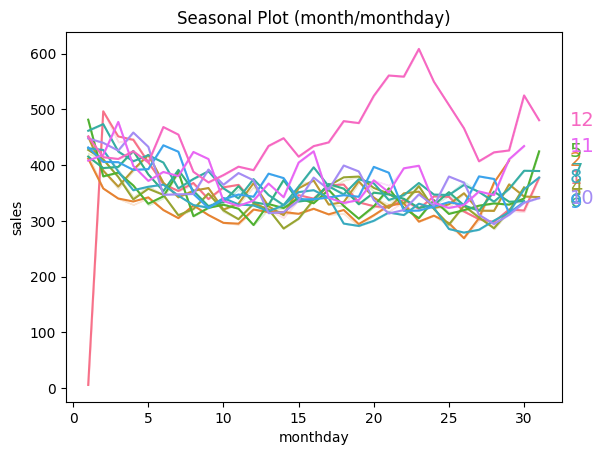

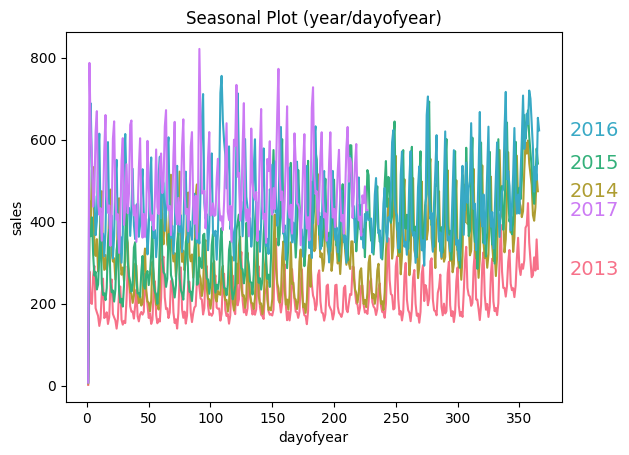

In [34]:
avg_sales = train_df.groupby('date')['sales'].mean().to_frame()

# days within a month
avg_sales["monthday"] = avg_sales.index.day  # the x-axis (freq)
avg_sales["month"] = avg_sales.index.month  # the seasonal period (period)

# days within a year
avg_sales["dayofyear"] = avg_sales.index.dayofyear
avg_sales["year"] = avg_sales.index.year

seasonal_plot(avg_sales, y=avg_sales['sales'], period="month", freq="monthday")
seasonal_plot(avg_sales, y=avg_sales['sales'], period="year", freq="dayofyear")



<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

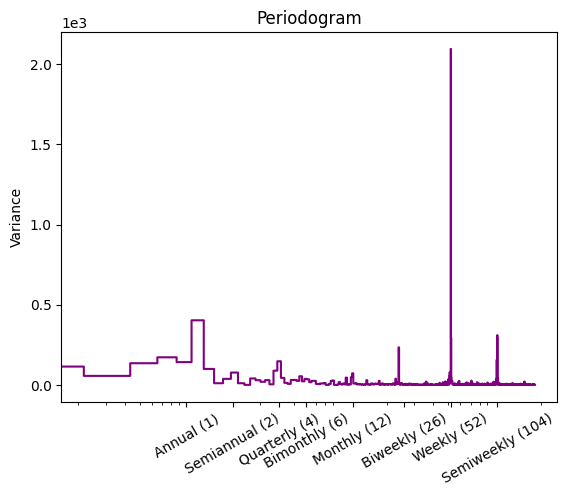

In [38]:
plot_periodogram(avg_sales.sales)

Our plots show that there is a high seasonality among annual seasons (likely holidays), but also weekly, biweekly and semiweekly occurences. So, we should include the day of the week for certain to cover the semiweekly and weekly occurences, but for the biweekly it may be better to include a time lag (we will get to this).

## Earthquake

A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. Let us look into the potential impact of the earthquake on store sales, and if a feature should be added which tags the earthquakes time proximity.

In [2]:
three_months_before_earthquake_date = pd.Timestamp(2016, 1, 16)
earthquake_date = pd.Timestamp(2016, 4, 16)
average_store_sales = train_df[['date', 'sales']].groupby('date', observed=False).sum()
earthquake_timeframe_df = average_store_sales[average_store_sales.index > three_months_before_earthquake_date].head(183)
earthquake_timeframe_df

,sales
date,
2016-01-17,1057997.38
2016-01-18,709784.25
2016-01-19,630929.75
2016-01-20,738744.00
2016-01-21,552820.75
...,...
2016-07-13,642494.38
2016-07-14,535124.31
2016-07-15,675032.44


<Axes: title={'center': 'Sales Average before and After Earthquake'}, xlabel='date'>

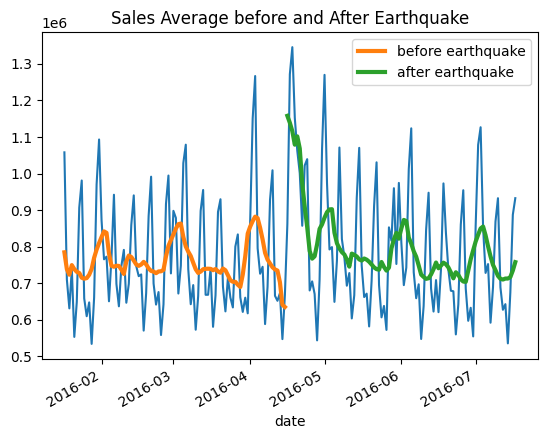

In [3]:
plt.plot(earthquake_timeframe_df.index, earthquake_timeframe_df['sales'])

moving_average = earthquake_timeframe_df[earthquake_timeframe_df.index < earthquake_date]['sales'].rolling(
    window=7,       
    center=True,      
    min_periods=3,  
).mean()

moving_average.plot(
    linewidth=3, title="Sales Average before and After Earthquake", legend=True, label="before earthquake"
)

moving_average = earthquake_timeframe_df[earthquake_timeframe_df.index >= earthquake_date]['sales'].rolling(
    window=7,       
    center=True,      
    min_periods=3,  
).mean()

moving_average.plot(
    linewidth=3, title="Sales Average before and After Earthquake", legend=True, label="after earthquake"
)

In [5]:
month_start_before_earthquake_date = pd.Timestamp(2016, 4, 1)
average_store_sales = train_df[['date', 'sales']].groupby('date', observed=False).sum()
closer_earthquake_timeframe_df = average_store_sales[average_store_sales.index > month_start_before_earthquake_date].head(31)

<Axes: title={'center': 'Sales Average before and After Earthquake'}, xlabel='date'>

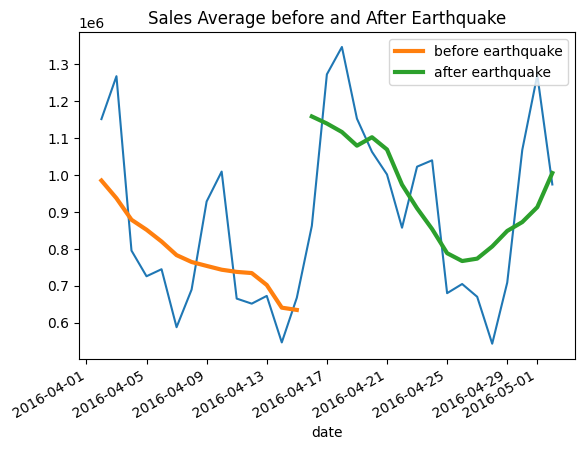

In [6]:
plt.plot(closer_earthquake_timeframe_df.index, closer_earthquake_timeframe_df['sales'])

moving_average = earthquake_timeframe_df[earthquake_timeframe_df.index < earthquake_date]['sales'].rolling(
    window=7,       
    center=True,      
    min_periods=3,  
).mean()

moving_average.plot(
    linewidth=3, title="Sales Average before and After Earthquake", legend=True, label="before earthquake"
)

moving_average = earthquake_timeframe_df[earthquake_timeframe_df.index >= earthquake_date]['sales'].rolling(
    window=7,       
    center=True,      
    min_periods=3,  
).mean()

moving_average.plot(
    linewidth=3, title="Sales Average before and After Earthquake", legend=True, label="after earthquake"
)

It looks like store sales plummeted around a week before the earthquake, and sales surged after the earthquake, so we should include a feature to note for the date of the earthquake and the next week, which we can see after that the cycles resume.

Upon a closer look it appears that on the 12th the sales begin to plummet, and sales surge until the 26th. 

## Time Lags

In [39]:
def lagplot(x, lag=1, ax=None):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(alpha=0.75, s=3)
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_, y=y_, scatter_kws=scatter_kws,
                     line_kws=line_kws, lowess=True, ax=ax)
    
    at = AnchoredText(f"{corr:.2f}", prop=dict(size="large"), frameon=True, loc="upper left")
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, lag=k + 1, ax=ax)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

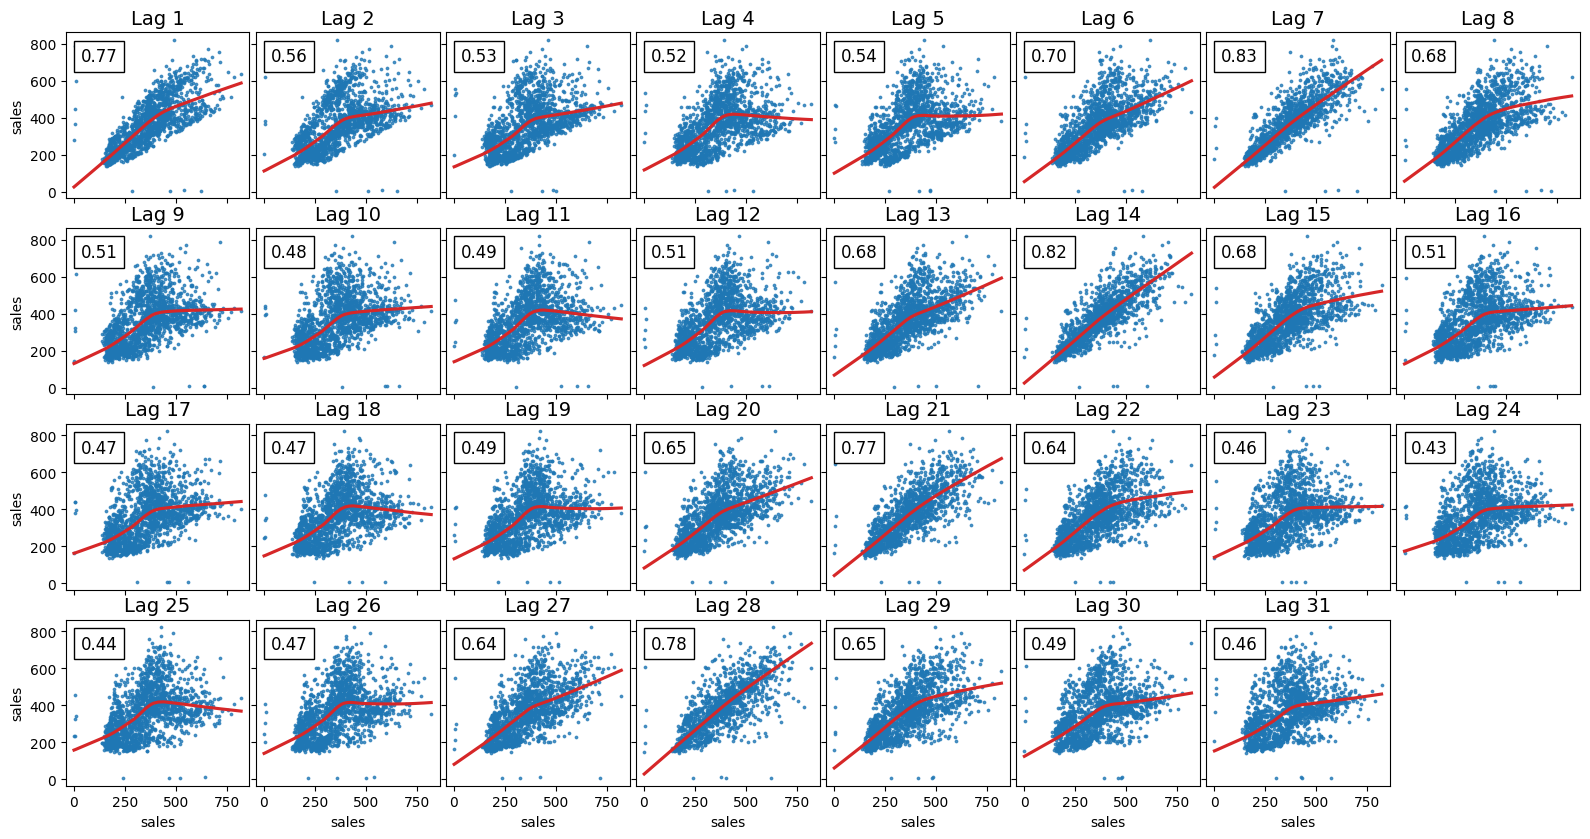

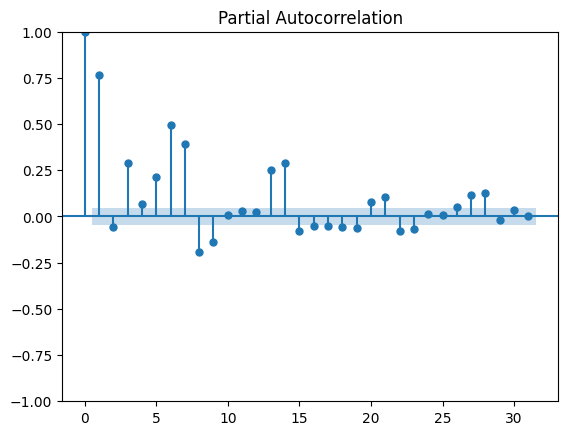

In [43]:
from statsmodels.graphics.tsaplots import plot_pacf

_ = plot_lags(avg_sales.sales, lags=31, nrows=4)
_ = plot_pacf(avg_sales.sales, lags=31)

Looking as far out as a month we can see that some time lags hold importance in correlation. Chiefly, lags, 1, 3, 5, 6, 7, 8, 9, 13, and 14 all have overwhelming correlation on sales.